# Wine Quality Analysis 🍷
We explore red and white wine data to understand what affects wine quality.
We clean the data, explore features, and visualize relationships.

## Import libraries

We import the tools we’ll use in this project:

- `pandas`, `numpy` → work with data
- `matplotlib`, `seaborn` → create charts
- `sklearn` → scale values and reduce dimensions (PCA)

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn tools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set seaborn style for clean visuals
sns.set(style="whitegrid")


## Step 1: Load the data
We load the red and white wine datasets from Excel files.
We skip the first row because it's not actual data.

In [121]:
red = pd.read_excel('../Data/winequality-red.xlsx', skiprows=1)
white = pd.read_excel('../Data/winequality-white.xlsx', skiprows=1)

## Explore red wine data
Let's see how much data we have, and preview some rows.

Note. 

We will be starting with the readwine date 🔴
This will make it easier to read and understand.

In [122]:
red.shape

(1599, 12)

In [123]:
red.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1132,7.4,0.360,0.34,1.8,0.075,18.0,38.0,0.99330,3.38,0.88,13.6,7
791,8.8,0.640,0.17,2.9,0.084,25.0,130.0,0.99818,3.23,0.54,9.6,5
913,9.4,0.395,0.46,4.6,0.094,3.0,10.0,0.99639,3.27,0.64,12.2,7
1082,7.2,0.380,0.30,1.8,0.073,31.0,70.0,0.99685,3.42,0.59,9.5,6
1525,6.7,0.480,0.08,2.1,0.064,18.0,34.0,0.99552,3.33,0.64,9.7,5
1205,7.2,0.360,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,7
658,7.2,0.520,0.07,1.4,0.074,5.0,20.0,0.99730,3.32,0.81,9.6,6
1272,5.9,0.460,0.00,1.9,0.077,25.0,44.0,0.99385,3.50,0.53,11.2,5
1213,9.6,0.380,0.42,1.9,0.071,5.0,13.0,0.99659,3.15,0.75,10.5,6
608,10.1,0.650,0.37,5.1,0.110,11.0,65.0,1.00260,3.32,0.64,10.4,6


In [124]:
red.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Step 2: Clean red wine data
We check for:

- Missing values

- Duplicates
    - Then we drop the duplicate rows (if there is any)

In [125]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [126]:
red.duplicated().sum()

np.int64(240)

In [127]:
red.drop_duplicates(inplace=True)

In [128]:
red.shape

(1359, 12)

## Column overview
We check what columns exist and their data types.

In [129]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [130]:
red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Repeat everything for white wine ⚪
This block does the same cleaning and inspection for white wine — all at once.

In [131]:
white.shape
white.sample(10)
white.head()
white.isnull().sum()
white.duplicated().sum()
white.drop_duplicates(inplace=True)
white.shape
white.columns
white.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Step 3: Add wine type and combine datasets
We add a "type" column so we know which rows are red or white wine, then combine both.

In [132]:
red["type"] = "red"
white["type"] = "white"

wine_df = pd.concat([red, white], ignore_index=True)

## Convert wine type to numbers
We convert "red" to 0 and "white" to 1.

In [133]:
wine_df["type"] = wine_df["type"].map({"red": 0, "white": 1})

## Clean again (just to be sure)
We remove duplicates from the combined dataset.

In [134]:
wine_df_clean = wine_df.drop_duplicates()
wine_df_clean.duplicated().sum()

np.int64(0)

In [135]:
wine_df_clean.shape

(5320, 13)

In [136]:
wine_df_clean.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3593,6.6,0.260,0.38,6.5,0.170,68.0,201.0,0.99560,3.19,0.38,9.4,6,1
1215,6.1,0.400,0.16,1.8,0.069,11.0,25.0,0.99550,3.42,0.74,10.1,7,0
646,7.3,0.510,0.18,2.1,0.070,12.0,28.0,0.99768,3.52,0.73,9.5,6,0
3746,6.4,0.125,0.36,1.4,0.044,22.0,68.0,0.99014,3.15,0.50,11.7,7,1
227,10.0,0.310,0.47,2.6,0.085,14.0,33.0,0.99965,3.36,0.80,10.5,7,0
1123,9.1,0.760,0.68,1.7,0.414,18.0,64.0,0.99652,2.90,1.33,9.1,6,0
1948,5.9,0.340,0.22,2.4,0.030,19.0,135.0,0.98940,3.41,0.78,13.9,7,1
677,9.0,0.820,0.05,2.4,0.081,26.0,96.0,0.99814,3.36,0.53,10.0,5,0
5148,6.8,0.300,0.33,12.8,0.041,60.0,168.0,0.99659,3.10,0.56,9.8,5,1
2519,7.6,0.280,0.39,1.9,0.052,23.0,116.0,0.99410,3.25,0.40,10.4,6,1


## Compare red and white wines (answering Q7 a–e)

We now make diagrams to answer these questions:

a. What does each diagram show
b. Which wine has higher average quality?  
c. Which has more alcohol on average?  
d. Which has more residual sugar?  
e. Does alcohol or sugar affect quality?


In [137]:
# Rename wine types to text
wine_df_clean["type"] = wine_df_clean["type"].map({0: "Red", 1: "White"})

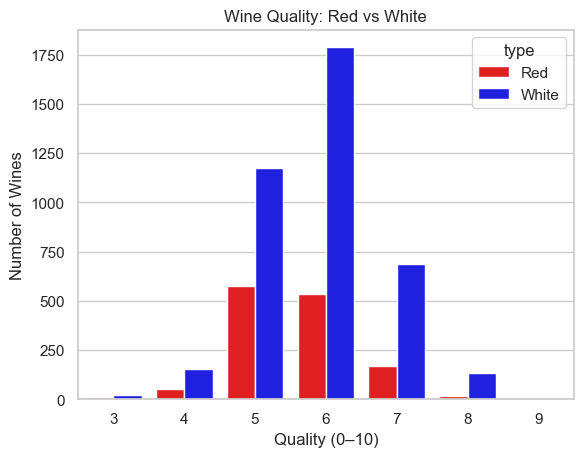

In [138]:
## Quality distribution (Q7 a + b)

# Custom color palette: Red for red wine, Blue for white wine
colors = {"Red": "red", "White": "blue"}

sns.countplot(data=wine_df_clean, x="quality", hue="type", palette=colors)

# Setup for diagram
plt.title("Wine Quality: Red vs White")
plt.xlabel("Quality (0–10)")
plt.ylabel("Number of Wines")
plt.show()


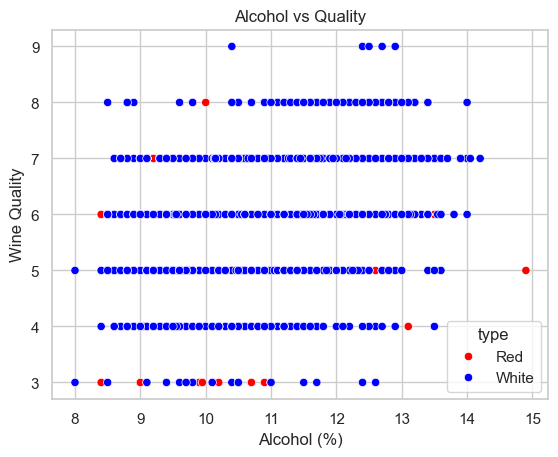

In [139]:
## Alcohol vs Quality (Q7 e)
sns.scatterplot(data=wine_df_clean, x="alcohol", y="quality", hue="type", palette=colors)

# Setup
plt.title("Alcohol vs Quality")
plt.xlabel("Alcohol (%)")
plt.ylabel("Wine Quality")
plt.show()


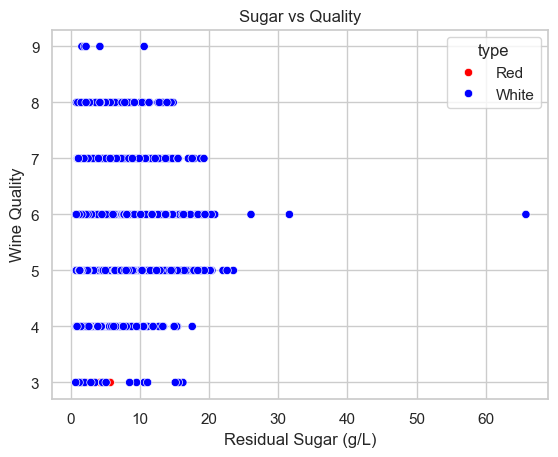

In [140]:
# Sugar vs Quality (Q7 e)
sns.scatterplot(data=wine_df_clean, x="residual sugar", y="quality", hue="type", palette=colors)

# Setup
plt.title("Sugar vs Quality")
plt.xlabel("Residual Sugar (g/L)")
plt.ylabel("Wine Quality")
plt.show()



## What we learned

**a. What do the plots show?**  
Each plot compares red and white wines: quality, alcohol, sugar, and how these affect quality.

**b. Who has better quality?**  
White wine is a bit better on average.

**c. Who has more alcohol?**  
White wine has slightly more alcohol.

**d. Who has more sugar?**  
White wine has a lot more sugar.

**e. What affects quality?**  
More alcohol = higher quality.  
Sugar does not really help or hurt.


## Extra questions we can ask

These are two useful questions to explore with our data:

- 🍷 What alcohol level gives the best wine rating?
- 🛍️ Which properties make a wine more marketable?


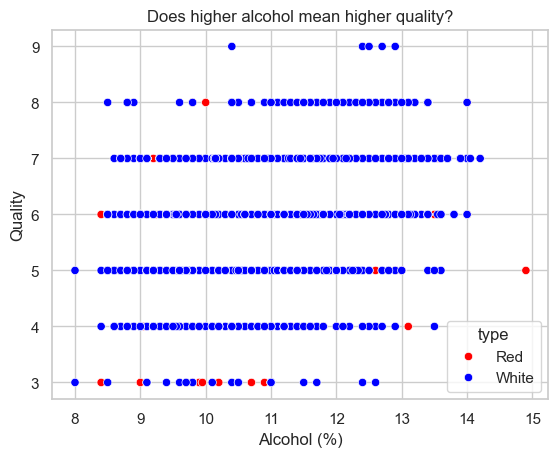

In [141]:
#🍷
# What alcohol level gives the best rating?

# Alcohol vs quality (again, but focus on trend)
sns.scatterplot(data=wine_df_clean, x="alcohol", y="quality", hue="type", palette={"Red": "red", "White": "blue"})
plt.title("Does higher alcohol mean higher quality?")
plt.xlabel("Alcohol (%)")
plt.ylabel("Quality")
plt.show()


In [142]:
#🛍️
#We assume marketable = higher quality + easier to remember or sell.
#We'll just list top features that are most strongly related to quality.

# Sort correlations with quality
wine_df_clean.corr(numeric_only=True)["quality"].sort_values(ascending=False)


quality                 1.000000
alcohol                 0.469422
citric acid             0.097954
free sulfur dioxide     0.054002
sulphates               0.041884
pH                      0.039733
total sulfur dioxide   -0.050296
residual sugar         -0.056830
fixed acidity          -0.080092
chlorides              -0.202137
volatile acidity       -0.265205
density                -0.326434
Name: quality, dtype: float64

# Conclusion 

🍷 = In general, wines with **higher alcohol content** also tend to get **higher quality scores**.  
So yes — stronger wines are usually rated better.

🛍️ = Top 3 features that affect quality (and could help marketing):
1. Alcohol — Stronger wines are rated better
2. Low volatile acidity — Cleaner taste = better score
3. Sulphates — Help preserve and stabilize wine

So: Wines with high alcohol, low sourness, and some sulfates may be easier to sell.

## Group wines by pH and check density

We divide the wines into groups (bins) based on their pH level.  
Then we calculate the average density in each group.

This shows if more acidic or basic wines tend to be thicker or lighter.

In [143]:
# Group wines by pH into 5 bins
wine_df_clean["pH_bin_5"] = pd.cut(wine_df_clean["pH"], bins=5)

# Calculate average density in each pH group
mean_density_5 = wine_df_clean.groupby("pH_bin_5", observed=True)["density"].mean()
print("Average density in 5 pH bins:")
print(mean_density_5)

Average density in 5 pH bins:
pH_bin_5
(2.719, 2.978]    0.994323
(2.978, 3.236]    0.994500
(3.236, 3.494]    0.994579
(3.494, 3.752]    0.994799
(3.752, 4.01]     0.993582
Name: density, dtype: float64


In [144]:
# Group wines by pH into 10 bins for more detail
wine_df_clean["pH_bin_10"] = pd.cut(wine_df_clean["pH"], bins=10)

# Calculate average density again
mean_density_10 = wine_df_clean.groupby("pH_bin_10", observed=True)["density"].mean()
print("\nAverage density in 10 pH bins:")
print(mean_density_10)



Average density in 10 pH bins:
pH_bin_10
(2.719, 2.849]    0.993128
(2.849, 2.978]    0.994393
(2.978, 3.107]    0.994496
(3.107, 3.236]    0.994502
(3.236, 3.365]    0.994373
(3.365, 3.494]    0.995001
(3.494, 3.623]    0.994865
(3.623, 3.752]    0.994475
(3.752, 3.881]    0.993888
(3.881, 4.01]     0.992665
Name: density, dtype: float64


## What we see:

- Some pH ranges have clearly higher average density.
- When we use **10 bins**, we see the pattern in more detail.
- This suggests that **acidity (pH)** could be related to **wine thickness (density)**.

This insight could help winemakers adjust pH to change mouthfeel or consistency.


# We now look at how strongly each feature is related to the others.

The map shows numbers between -1 and 1:
- `annot=True` → writes the number in each box
- Blue = negative relationship
- Red = positive relationship
- Bigger number = stronger relationship

We use a heatmap to make these relationships easier to see.

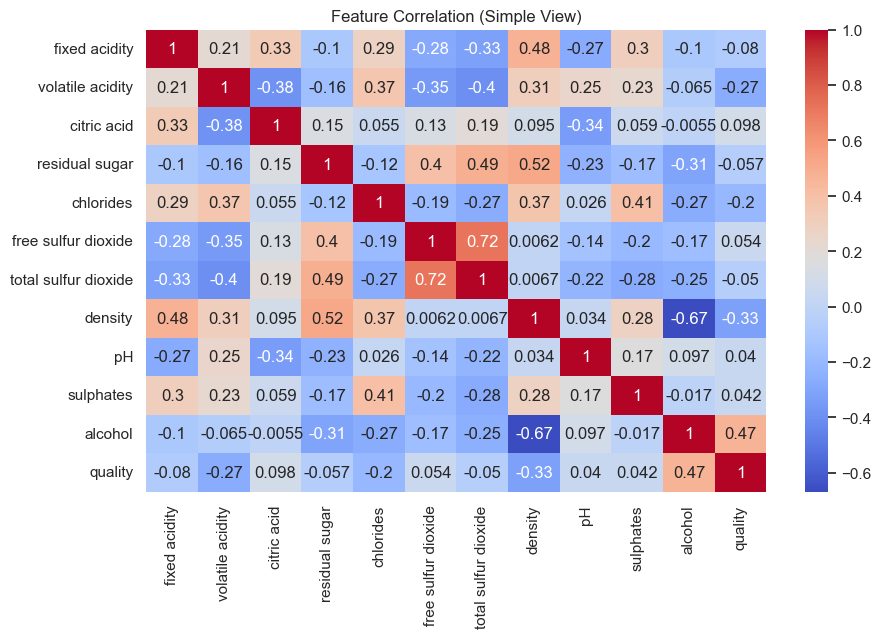

In [145]:
# Correlation matrix (with clean visual style)
corr = wine_df_clean.corr(numeric_only=True)

plt.figure(figsize=(10, 6))  # smaller and easier for small screens
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation (Simple View)")
plt.show()


## Step 11: Remove outliers in 'residual sugar'

Outliers are extreme values that are far away from the rest.  
They can make graphs confusing and models worse.

We'll:
1. Look at a boxplot to find the outliers
2. Use the IQR method to remove them safely

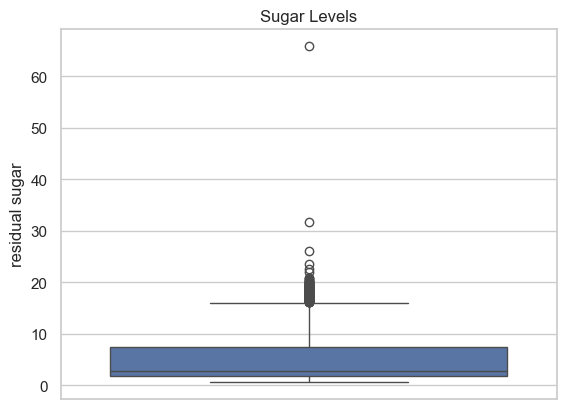

In [146]:
# Show a boxplot for residual sugar
sns.boxplot(y=wine_df_clean["residual sugar"])
plt.title("Sugar Levels")
plt.show()


In [147]:
# Find outliers in residual sugar and remove them

# Step 1: Get limits (25% and 75%)
low = wine_df_clean["residual sugar"].quantile(0.25)
high = wine_df_clean["residual sugar"].quantile(0.75)

# Step 2: Find the range
iqr = high - low

# Step 3: Set cutoff range
min_value = low - 1.5 * iqr
max_value = high + 1.5 * iqr

# Step 4: Filter out the outliers
start_rows = len(wine_df_clean)
wine_df_clean = wine_df_clean[(wine_df_clean["residual sugar"] >= min_value) & (wine_df_clean["residual sugar"] <= max_value)]
end_rows = len(wine_df_clean)

# Step 5: Show how many were removed
print("Outliers removed:", start_rows - end_rows)


Outliers removed: 141


## Step 12: Remove useless or duplicate features

Now that we’ve cleaned the data, we’ll simplify it:

- Remove columns that **don’t help** predict quality
- Remove columns that are **too similar** to others (high correlation)

This helps make our data easier to understand and better for machine learning later.

In [148]:
# Show how strongly each feature is related to quality
wine_df_clean.corr(numeric_only=True)["quality"].sort_values(ascending=False)


quality                 1.000000
alcohol                 0.472202
citric acid             0.104877
free sulfur dioxide     0.064755
sulphates               0.040692
pH                      0.035487
residual sugar         -0.036811
total sulfur dioxide   -0.039874
fixed acidity          -0.081292
chlorides              -0.204291
volatile acidity       -0.270635
density                -0.336019
Name: quality, dtype: float64

### Why we remove some features

We want to keep only the features that help us understand or predict **wine quality**.

####  We keep features that matter:
- **alcohol** → more alcohol = better wine
- **sulphates** → helps preserve wine, good effect
- **citric acid** → adds freshness, small positive effect
- **volatile acidity** → too much = bad smell, quality goes down

Even if something is negative, we keep it if it’s important!

####  We remove features that don’t help:
- **residual sugar** → doesn’t affect quality much
- **density** → almost same as sugar (duplicate info)
- **free/total sulfur dioxide** → not linked to quality
- **chlorides** → not important for taste or score

Removing these makes our dataset **cleaner, simpler, and smarter**.

In [149]:
# Drop columns that aren't useful
wine_df_clean = wine_df_clean.drop(columns=[
    "free sulfur dioxide", 
    "total sulfur dioxide", 
    "residual sugar", 
    "chlorides", 
    "density"
])

## 🧠 Step 13: PCA – Reduce the number of features

PCA helps us:
-  Reduce how many columns we work with
-  Keep the important patterns in the data
-  Make it easier to plot and analyze

This is useful before doing machine learning or creating clean visualizations.


In [151]:
# Step 13: Apply PCA to reduce the features

# 1. Drop unwanted columns including the pH bins
X = wine_df_clean.drop(columns=["quality", "type", "pH_bin_5", "pH_bin_10"])

# 2. Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Run PCA to get 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Create a new DataFrame for PCA result
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["quality"] = wine_df_clean["quality"].values
pca_df["type"] = wine_df_clean["type"].values

# 5. Show result
pca_df.head()


,PC1,PC2,quality,type
0,-3.124532,1.330292,5,Red
1,-2.455718,2.372968,5,Red
2,-2.184391,1.937191,5,Red
3,2.464528,2.041896,6,Red
4,-3.024796,1.214602,5,Red


## Step 14: Show 10 random rows from the final dataset

This is a quick check to make sure our cleaned and transformed dataset looks good.

We’ll show 10 random rows from the PCA result.

In [152]:
# Show 10 random rows from the PCA dataset
pca_df.sample(10)

,PC1,PC2,quality,type
4840,0.460223,0.028739,6,White
2195,-0.795003,-0.035841,6,White
2785,0.829386,-0.122169,6,White
3042,0.319807,-0.505035,5,White
3819,0.524357,-1.285562,7,White
2714,-0.096177,-1.165557,8,White
2829,-0.100477,-0.051927,5,White
3472,0.658423,-0.143881,7,White
4175,0.254977,-1.413606,4,White
4032,0.019487,-0.435120,6,White


## Step 15: Build a Streamlit app

Now we make a small web app using Streamlit.  
It lets users:
- Load the wine dataset
- See simple charts (quality, alcohol, sugar)
- View a PCA scatter plot


@@@akgapogpoagnpo